<a href="https://colab.research.google.com/github/jlcolbur/Breakouts/blob/master/MapofCAZip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import folium

map_ = folium.Map(location=[36.77, -119.41], zoom_start=6)
df = pd.read_csv("/content/CAZip-2017.csv")

locs = df[['lat', 'long']]
loc_list = locs.values.tolist()


for point in range(0, len(loc_list)):
    folium.Marker(loc_list[point]).add_to(map_)

map_

In [0]:
# QUIT CLOROPLETH AFTER TOO MANY ISSUES GETTING SHAPE FILES AT ZIP CODE LEVEL
#zip_code_geo = pd.read_json("/content/ca_california_zip_codes_geo.min.json")

#map_2 = folium.Map(location=[36.77, -119.41], zoom_start=6)

#folium.Choropleth(
 #   geo_data=zip_code_geo,
  #  name='choropleth',
   # data= df,
    #columns=['Zip_Code', 'Housing_Price'],
#    key_on='Zip_Code',
 #   fill_color='YlGn',
  #  fill_opacity=0.7,
   # line_opacity=0.2,
    #legend_name='Housing Price'
#).add_to(m)

#folium.LayerControl().add_to(m)

#map_2

In [28]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (166 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1bu

In [10]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702063 sha256=e0dcfb5ada8ef937dea3111a4638b11b28b541967b484535d22699230407ba55
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.3.1
    Uninstalling pyproj-2.3.1:
      Successfully uninstalled pyproj-2.3.1


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


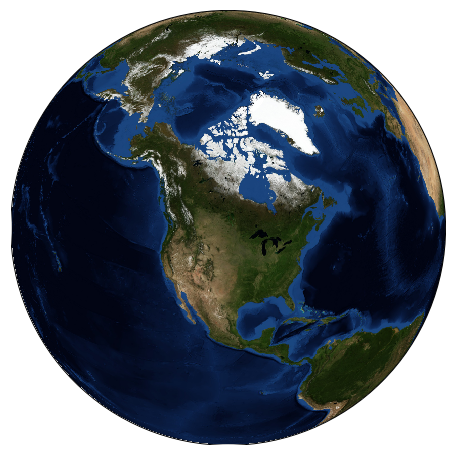

In [6]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [0]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
population = df['Population'].values
housingprice = df['Housing_Price'].values

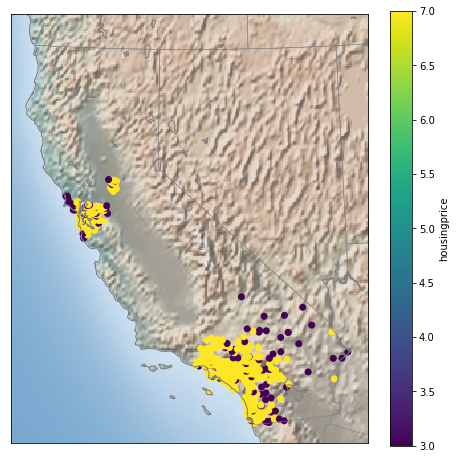

In [15]:
#Housing Price Map
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=housingprice
          )

# 3. create colorbar and legend
plt.colorbar(label=r'housingprice')
plt.clim(3, 7)


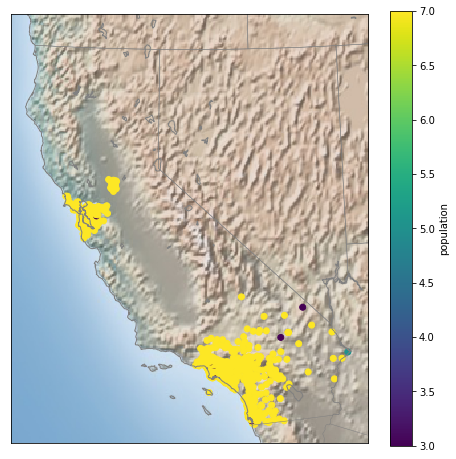

In [16]:
# Population Map
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m2 = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m2.shadedrelief()
m2.drawcoastlines(color='gray')
m2.drawcountries(color='gray')
m2.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m2.scatter(lon, lat, latlon=True,
          c=population
          )

# 3. create colorbar and legend
plt.colorbar(label=r'population')
plt.clim(3, 7)
